In [1]:
#importamos las libretas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
#cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

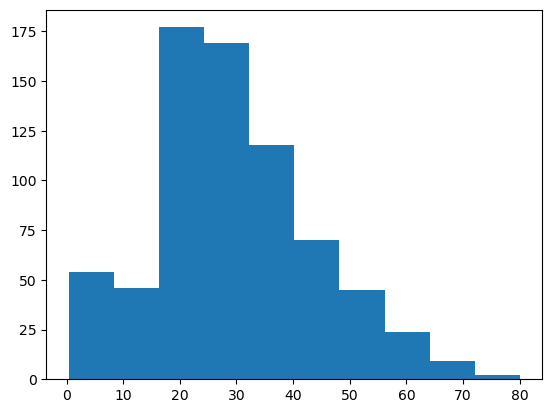

In [18]:
plt.hist(data.Age)

<Axes: xlabel='Age', ylabel='Survived'>

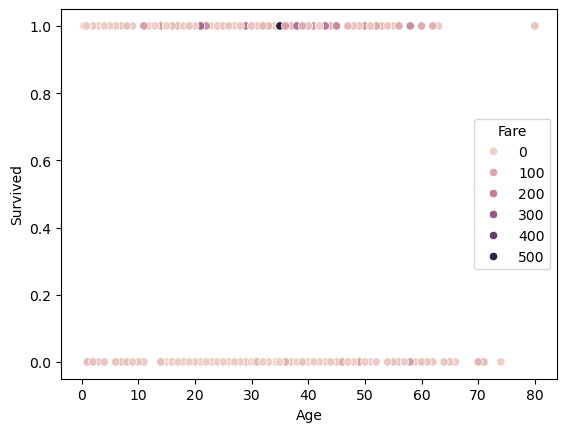

In [56]:
sns.scatterplot(x="Age", y = "Survived", hue = "Fare", data = data)

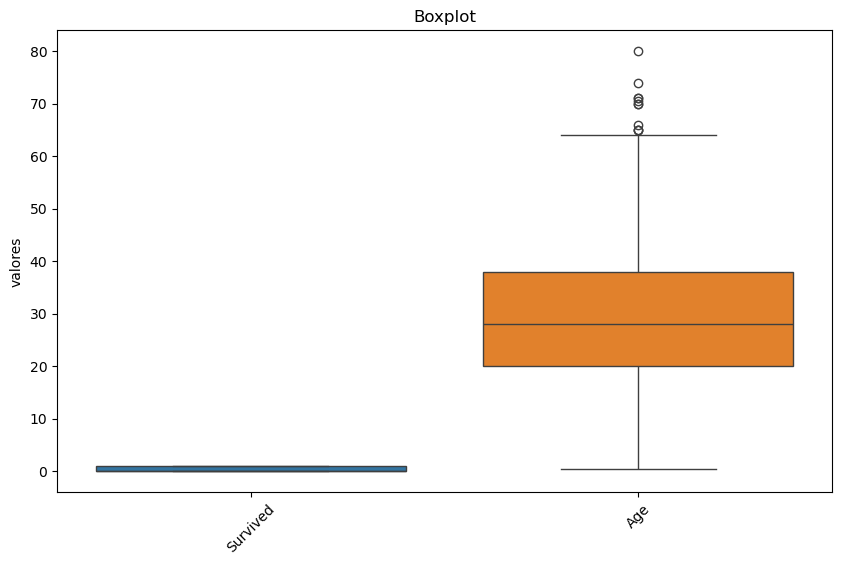

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Survived', 'Age', 'Sex', 'Embarked']])
plt.xticks(rotation=45)
plt.title('Boxplot')
plt.ylabel('valores')
plt.show()

In [76]:
predictors_col = ['Survived', 'Age', 'PassengerId', 'Fare']
target_col = ['Sex']

In [78]:
predictors = data[predictors_col]
target = data[target_col]

In [80]:
predictors

,Survived,Age,PassengerId,Fare
0,0,22.0,1,7.2500
1,1,38.0,2,71.2833
2,1,26.0,3,7.9250
3,1,35.0,4,53.1000
4,0,35.0,5,8.0500
...,...,...,...,...
886,0,27.0,887,13.0000
887,1,19.0,888,30.0000
888,0,NaN,889,23.4500
889,1,26.0,890,30.0000


In [72]:
target

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [82]:
corr = predictors.corr()
corr

,Survived,Age,PassengerId,Fare
Survived,1.000000,-0.077221,-0.005007,0.257307
Age,-0.077221,1.000000,0.036847,0.096067
PassengerId,-0.005007,0.036847,1.000000,0.012658
Fare,0.257307,0.096067,0.012658,1.000000


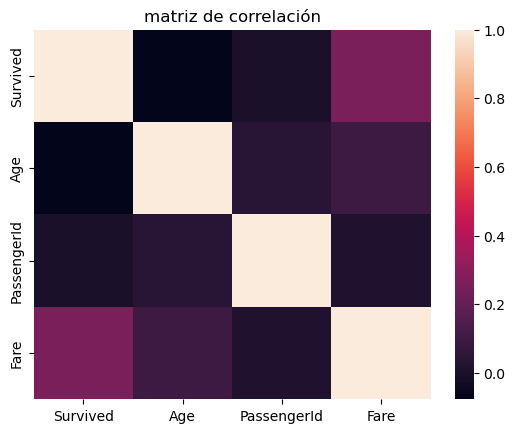

In [84]:
sns.heatmap(corr)
plt.title('matriz de correlación')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [96]:
# Examinamos la matriz de confusiòn
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=['predicciones'])

predicciones,female,male
Actual,,
female,43,28
male,12,96


In [102]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.776536312849162

In [104]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.7772178443290355

In [106]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.776536312849162

In [108]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.770053786620922